# **Import Dataset e Librerie necessarie**

In [54]:
!pip install -r requirements.txt

In [55]:
#Importo librerie necessarie 
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
sns.set(palette="rainbow")
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [56]:
#Carico dataset di training e test
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

# **Analisi preliminare e pulizia dataset**

In [57]:
#Analizzo la dimensione dei due set
print('Dimensione train set: ' + str(train.shape))
print('Dimensione test  set: ' + str(test.shape))

Dimensione train set: (137, 14)
Dimensione test  set: (35, 14)


noto già da subito che la dimensione del set è molto piccola quindi potrebbero verificarsi problemi nella predizione 

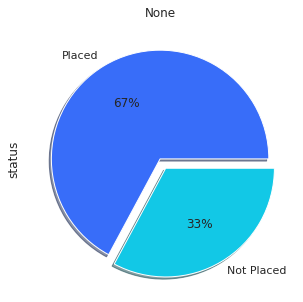

In [58]:
# Per prima cosa, vediamo come si ripartiscono i candidati nelle due categorie.
def plot_target_distribution(target):
    exited_value_counts = target.value_counts()
    plot = exited_value_counts.plot.pie(
        figsize = (5, 5),
        explode = (0, 0.1),
        shadow = True,
        autopct = '%1.0f%%',
        labels = ['Placed', 'Not Placed'],
        title = 'None'
    )

plot_target_distribution(train['status'])
plt.show()

Notiamo da subito che ci saranno più studenti collocati rispetto a quelli non colllocati

In [59]:
# Visualizzo i primi 8 elementi del dataset
train.head(8)

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Placed,M,81.70,Others,63.00,Others,Science,67.00,Comm&Mgmt,Yes,86.00,Mkt&Fin,70.20,300000.0
1,Placed,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.00,Mkt&Fin,53.62,275000.0
2,Placed,M,72.00,Others,63.00,Others,Science,77.50,Sci&Tech,Yes,78.00,Mkt&Fin,54.48,250000.0
3,Placed,M,77.67,Others,64.89,Others,Commerce,70.67,Comm&Mgmt,No,89.00,Mkt&Fin,60.39,300000.0
4,Placed,M,65.00,Central,71.50,Others,Commerce,62.80,Comm&Mgmt,Yes,57.00,Mkt&Fin,56.60,265000.0
5,Placed,M,70.00,Central,63.00,Central,Science,66.00,Sci&Tech,No,61.28,Mkt&HR,60.11,240000.0
6,Not Placed,F,67.00,Central,53.00,Central,Science,65.00,Sci&Tech,No,64.00,Mkt&HR,58.32,NaN
7,Not Placed,F,77.80,Central,64.00,Central,Science,64.20,Sci&Tech,No,75.50,Mkt&HR,72.14,NaN


In [60]:
#Conto e cerco se ci sono null
missing_values_count = train.isnull().sum()
missing_values_count

status             0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            45
dtype: int64

Noto che l'unica feature con valori nulli è salario. Per visualizzare meglio le proprietà del salario e stampare grafici più esplicativi decido di sostituire i valori nulli con 0.

In [61]:
#sostituisco i valori nulli con 0  
train['salary'] = train['salary'].replace(np.NaN, 0)
test['salary'] = test['salary'].replace(np.NaN, 0)

In [62]:
#Mostro il tipo del dataset
train.dtypes

status             object
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
salary            float64
dtype: object

Noto che i tipi sono buoni, prevalentemente numerici, quelli che non lo sono per il momento nella parte di analisi preliminare li lascio in questo modo per avere grafici più significativi

In [63]:
#Cerco i dettagli del dataset per notare valori significativi
train.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,67.106058,66.194088,66.303358,72.254307,62.246788,197321.167883
std,10.667288,10.895047,7.485084,13.397838,6.100512,161389.141259
min,40.890000,39.000000,50.000000,50.000000,51.210000,0.000000
25%,61.000000,60.800000,61.000000,60.000000,57.340000,0.000000
50%,67.000000,65.000000,65.600000,71.000000,61.580000,240000.000000
75%,74.000000,72.800000,71.930000,84.000000,66.060000,300000.000000
max,87.000000,97.700000,91.000000,98.000000,77.890000,940000.000000


#**Analisi distribuzioni**

## Feature divise per categoria

Analizzo tutte le feature divise in categorie

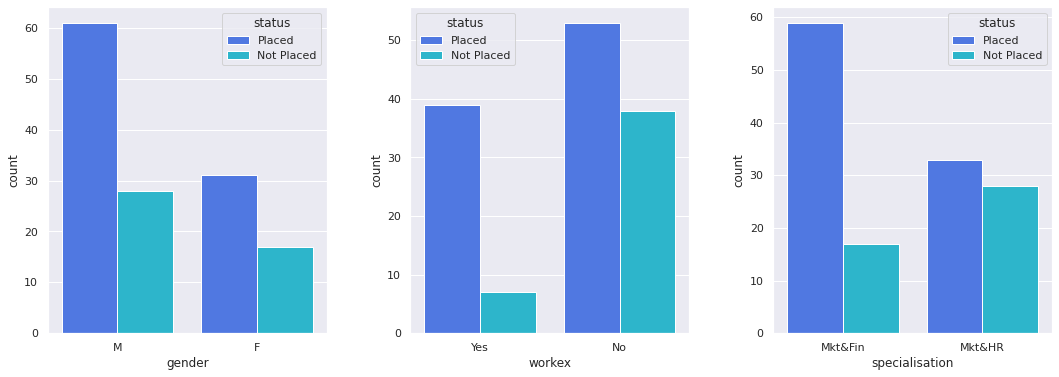

In [64]:
#Prendo in considerazione Genere, Esperienza lavorativa e Specializzazione 
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "gender", hue="status", data = train, ax= ax[0])
sns.countplot(x = "workex", hue="status", data = train, ax = ax[1])
sns.countplot(x = "specialisation", hue="status", data = train, ax = ax[2])
plt.show()

Da questi grafici possiamo notare che è molto importante l'esperienza lavorativa, come possiamo vedere nel secondo grafico quasi tutti quelli che hanno avuto un eperienza lavorativa hanno ricevuto un offerta, inoltre possiamo notare anche come i maschi trovano più facilmente lavoro e la specializzazione post laurea più richiesta è quella in Mkt&Fin

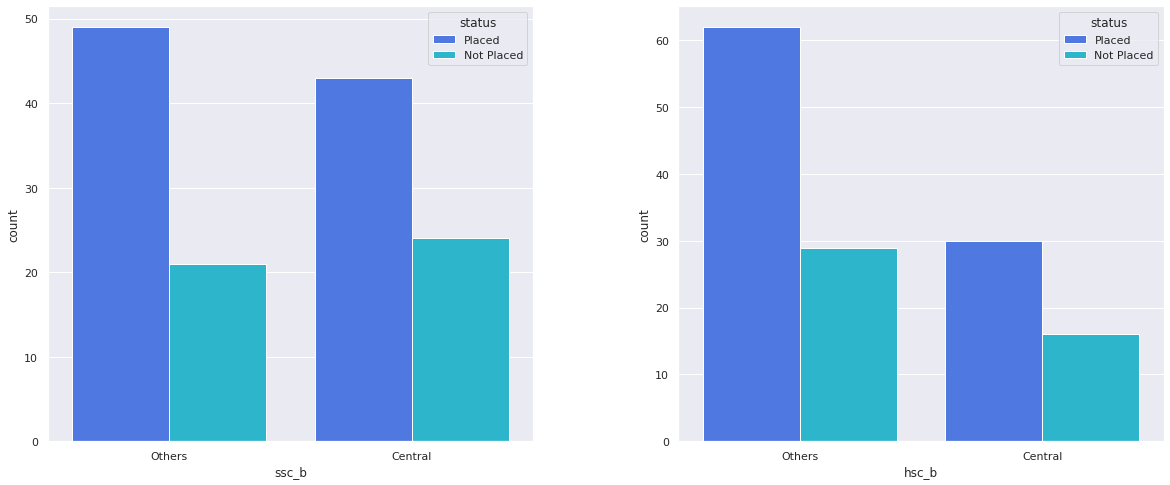

In [65]:
#Grafico per Board of Education per le medie e il diploma
_, ax = plt.subplots(1, 2, figsize=(20, 8))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "ssc_b", hue="status", data = train, ax= ax[0])
sns.countplot(x = "hsc_b", hue="status", data = train, ax = ax[1])
plt.show()

Continuo ad analizzare le feature "categoriche" e mentre in quelle precedenti potevamo notare quanto i dati fossero significativi queste hanno valori molto poco significativi, successivamente le analizzeremo con il grafico di correlazione per valutare se rimuoverle o meno.  

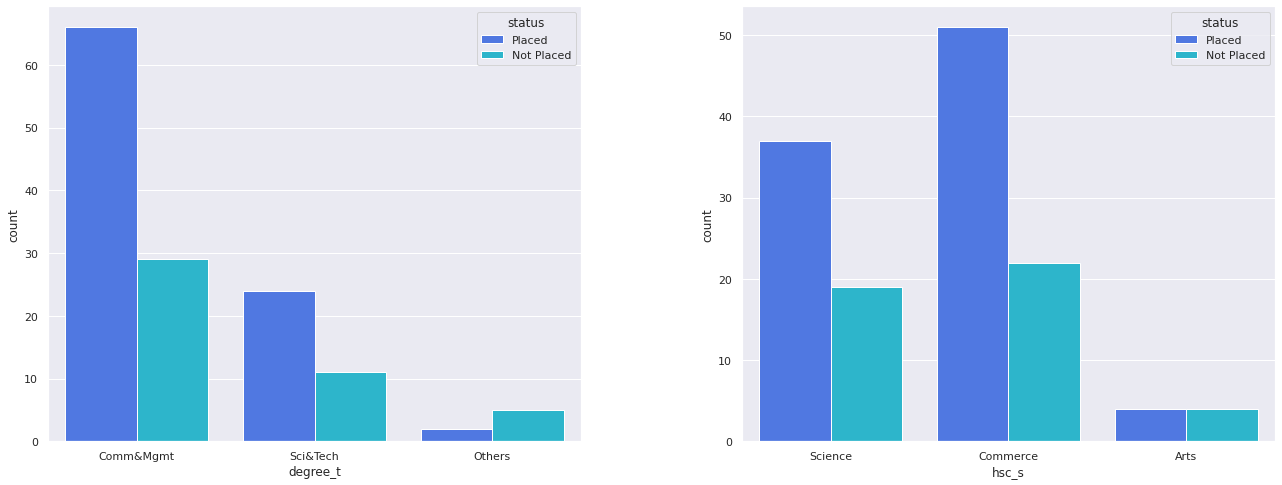

In [66]:
#Grafico per Tipologia Liceo e Settore disciplinare laurea
_, ax = plt.subplots(1, 2, figsize=(22, 8))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "degree_t", hue="status", data = train, ax = ax[0])
sns.countplot(x = "hsc_s", hue="status", data = train, ax = ax[1])
plt.show()

Da questi ultimi due grafici per le categorie notiamo come sia più semplice trovare collocazione a seconda del settore disciplinare della laurea, Comm&Mgmt è quella con possibilità più alte mentre quelle non appartenenti alle prime due tipologie difficilmente trovano collocazione, anche se questo valore và preso con le pinze poichè notiamo che abbiamo pochi Others. La stessa analisi la possiamo fare per il secondo grafico relativo alla tipologia del liceo, Commerce hsc_s e Scienze hanno probabilità più altre mentre Arte sono perfettamente bilanciati ma ci sono poche casistiche

## Feature numeriche

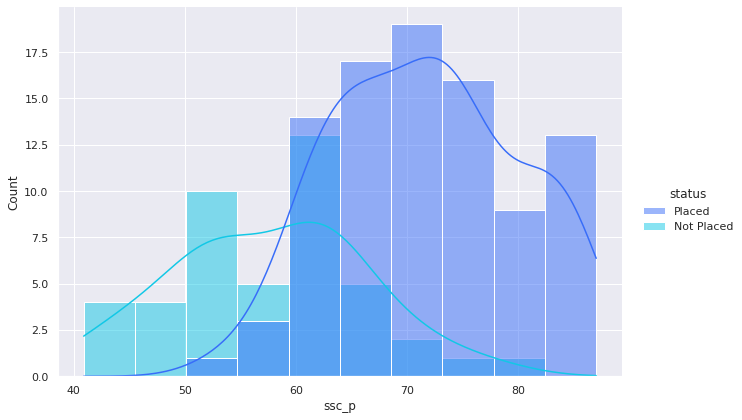

In [67]:
#Visualizzazione distribuzione Punteggio di scuola media
sns.displot(data=train, x="ssc_p", hue="status",  height=6, aspect=1.5, kde = True)
plt.show()

Dalla distribuzione notiamo che i voti sopra al 70 hanno un alta probabilità trovare collocamento mentre nella fascia 60-70 la probabilità non è cosi netta mentre inferiore al 60 difficilmente trovano collocamento

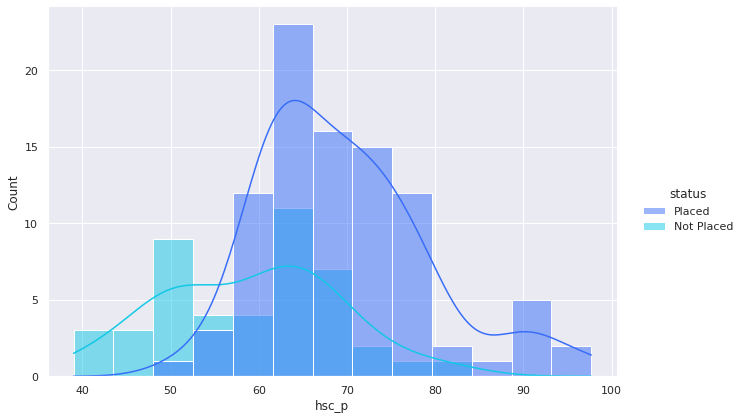

In [68]:
#Visualizzazione distribuzione Punteggio di diploma
sns.displot(data=train, x="hsc_p", hue="status",  height=6, aspect=1.5, kde = True )
plt.show()

Qui possiamo notare un andamento simile a quello precedente con la differenza che più il voto è alto più è semplice trovare collocazione, nei voti intermedi (60-70) vi è comunque una percentuale superiore a quella precedente quindi notiamo che un voto piu alto per il diploma è più significativo rispetto a quello della scuola media

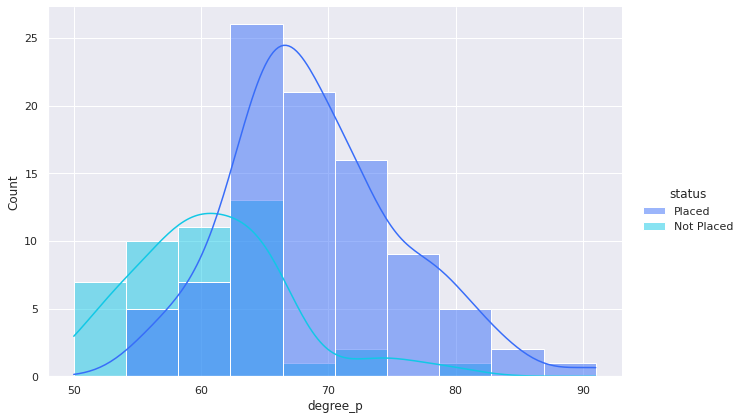

In [69]:
#Visualizzazione distribuzione  Punteggio di laurea
sns.displot(data=train, x="degree_p", hue="status",  height=6, aspect=1.5, kde = True)
plt.show()

Con la distribuzione del voto di laurea invece notiamo come ci sia una distinzione netta per gli studenti con una votazione superiore al 65, quasi tutti trovano collocazione

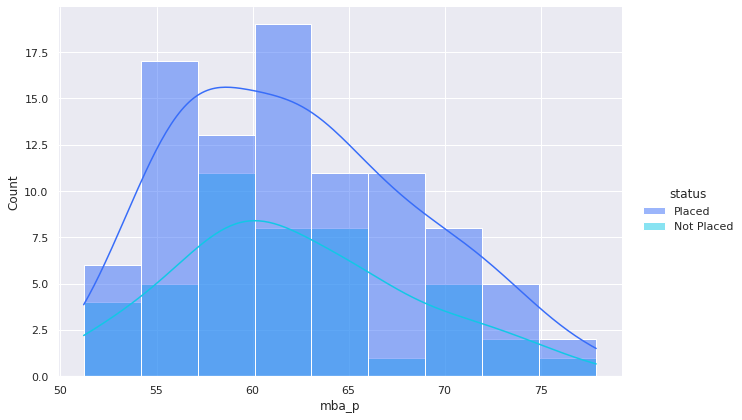

In [70]:
#Visualizzazione distribuzione MBA
sns.displot(data=train, x='mba_p', hue="status",  height=6, aspect=1.5, kde = True)
plt.show()

Da quest'ultima distribuzione non notiamo valori significativi quindi successivamente la analizzeremo meglio con il grafico di correlazione per vedere se eliminarla o meno  

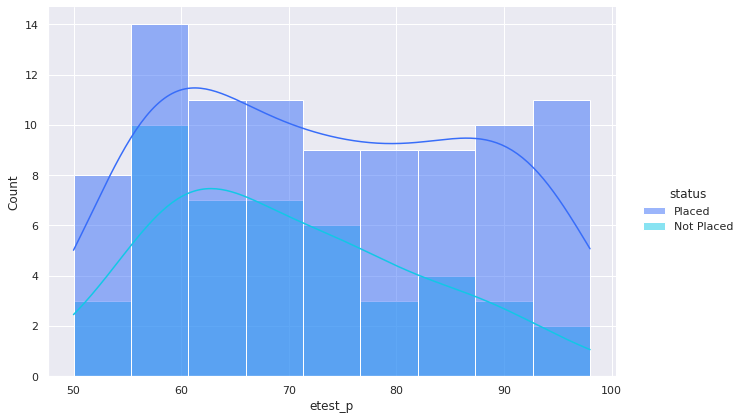

In [71]:
#Visualizzazione distribuzione test di collocabilità
sns.displot(data=train, x='etest_p', hue="status",  height=6, aspect=1.5, kde = True)
plt.show()

Mentre in quest'ultimo grafico notiamo come un alta valutazione al test di collocabilità denoti quasi la certezza di ricevere un offerta di lavoro

# **Trasformazione Dataset**

applico il label encoder per trasformare i valori non numerici

In [72]:
#Encoding 
le = preprocessing.LabelEncoder()
for l in train:
  if ((l=='status')|(l=='ssc_b')|(l=='gender')|(l=='hsc_b')|(l=='hsc_s')|(l=='degree_t')|(l=='workex')|(l=='specialisation')):
    train[l]=le.fit_transform(train[l].astype(str))
    test[l]=le.fit_transform(test[l].astype(str))

# **Rimozione feature**

adesso andiamo ad analizzare la correlazione delle feature per vedere se notiamo valori particolari 

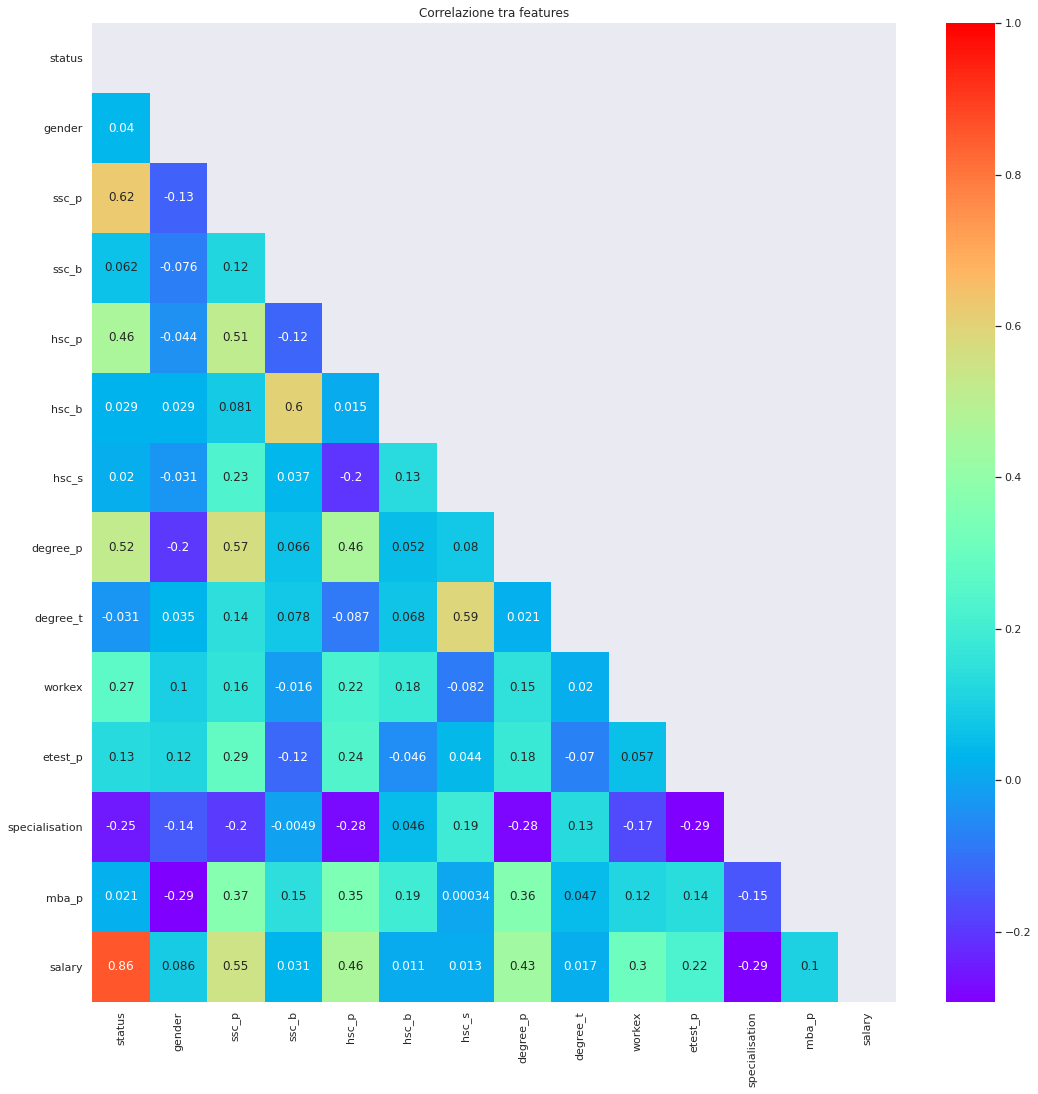

In [73]:
#Correlation Graphic
correlation = train.corr()
plt.figure(figsize=(18,18))
mask = np.triu(np.ones_like(train.corr()))
sns.heatmap(correlation, vmax=1,  cmap='rainbow', mask=mask, annot=True)
plt.title('Correlazione tra features')
plt.show()

##Analisi feature Salary
Noto una alta corrispondenza tra salario e status, voglio vedere in particolare per quali valori, decido di analizzare in dettaglio se esistono persone assunte che non hanno un offerta, tramite questo grafico

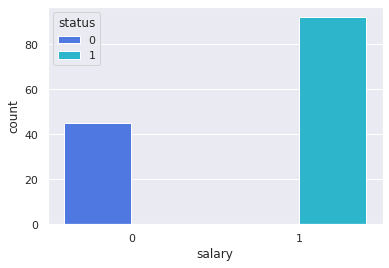

In [74]:
sns.countplot(x = train["salary"].map(lambda x : 1 if x!=0 else 0), hue="status", data = train)
plt.show()

Noto che non è cosi quindi questa feature effettua un peaking dato che solo gli studenti che hanno ricevuto un offerta verranno assunti e per questo motivo decido di rimuoverla

In [75]:
#Rimozione feature Salary
train=train.drop(axis=1, columns='salary')
test=test.drop(axis=1, columns='salary')

## Analisi feature HSC_B, SSC_B e MBA_P 

Noto sia dal grafico di correlazione che dal grafico visto in precedenza che hsc_b e MBA_P hanno una bassissima correlazione con status e non danno alcun valore significativo quindi decido di rimuoverli. Mentre decido di tenere SSC_B poichè notiamo dal grafico che possiede una correlazione più alta rispetto a queste ultime due feature quindi decido di tenerla 

In [76]:
#Rimozione feature hsc_b e ssc_b
train=train.drop(axis=1, columns='hsc_b')
test=test.drop(axis=1, columns='hsc_b')
train=train.drop(axis=1, columns='mba_p')
test=test.drop(axis=1, columns='mba_p')

# **Valutazione finale** 

In [77]:
# Suddivido train e test set in features (X) e target (y).
trainY=train['status']
testY=test['status']
trainX=train.drop('status', axis=1)
testX=test.drop('status', axis=1)

In [78]:
#Model training and score(Modello non spiegato a lezione, è un classificatore d'insieme che si ottiene dall'aggregazione di alberi di decisione)
forest = RandomForestClassifier()
forest.fit(trainX, trainY)
prediction = forest.predict(testX)
print('Accuracy:',(accuracy_score(testY, prediction)* 100), "%")

Accuracy: 94.28571428571428 %


Text(0.5, 12.5, 'Predicted label')

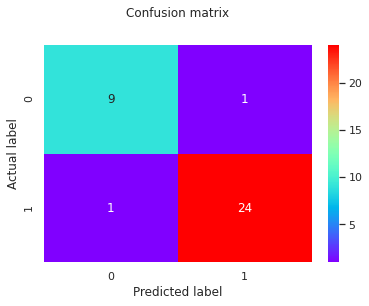

In [79]:
#Confusion Matrix(Grafico utile per notare dove sono stati compiuti più errori da parte del modello)
predY = forest.predict(testX)
cnf_matrix = metrics.confusion_matrix(testY, predY)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="rainbow" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Con questo grafico possiamo vedere che gli errori compiuti si sono verificati allo stesso modo sia per predire quelli collocati che quelli non collocati, ma notiamo come sia troppo esiguo il dataset per arrivare a conclusioni definitive